![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
import seaborn as sns

In [3]:
sns.reset_orig()

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', 
                    index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [5]:
bikes.shape

(10886, 12)

### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
bikes[['season','hour']].describe()

,season,hour
count,10886.000000,10886.000000
mean,2.506614,11.541613
std,1.116174,6.915838
min,1.000000,0.000000
25%,2.000000,6.000000
50%,3.000000,12.000000
75%,4.000000,18.000000
max,4.000000,23.000000


In [9]:
bikes[['season','hour']].corr()

,season,hour
season,1.000000,-0.006546
hour,-0.006546,1.000000


### Conclusiones inciales

* Se observa en esta primera parte que tenemos una base con 10886 registros y 12 columnas (variables).

* De acuerdo al resultado de la celda 1.1, podemos concluir que la temporada con mejor promedio en el arquiler de bicicletas es la temporada de verano (3), seguida de la temporada de primavera (2), luego otoño (4) y finalmente en invierno (1) es donde en promedio menos bicicletas se alquilan.

* De acuerdo al resultado de la celda 1.2, se observa que existe una relación entre la hora del día y el número de alquiler de bicicletas. Donde ademas podemos ver que para los 8:00 de la mañana existe un pico, seguido de otro que inicia a las 16:00 horas hasta las 19:00 horas.

* Sobre las estadisticas descritivas podemos decir que:
  * No se observan cifras atípicas en las estadisticas descriptivas, las variables idican las horas del día y la otra idica una temporada del año.

* Con respecto a la correlación, existe una correlación negativa pero que no es significativa.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

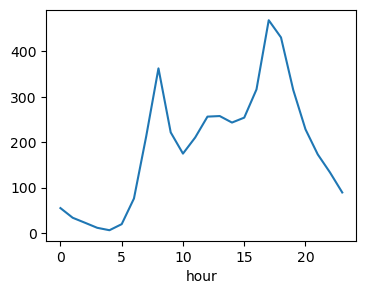

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
plt.figure(figsize=(4,3))
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

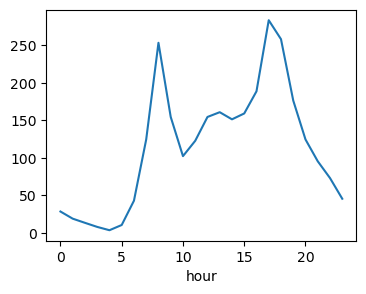

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bike_Winter = bikes[bikes["season"]==1]
plt.figure(figsize=(4,3))
bike_Winter.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

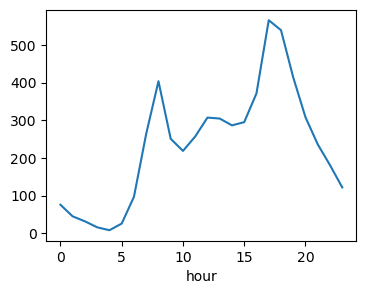

In [12]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bike_Summer = bikes[bikes["season"]==3]
plt.figure(figsize=(4,3))
bike_Summer.groupby('hour').total.mean().plot()

### Analisis

* De acuerdo a los resultados, se observa que el comportamiento del alquiler del número de bicicletas versus las horas del día tiene un comportamiento muy similar tanto en invierno como en verano.

* Pero la cantidad de bicicletas que se alquilan en verano casi duplican las cantidades de las que se alquilan durante el invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [105]:
# Celda 3
df_P3 = bikes[["season", "hour"]]
y = bikes["total"]

In [106]:
X = pd.get_dummies(df_P3, columns=['season'])
X.head(3)

,hour,season_1,season_2,season_3,season_4
datetime,,,,,
2011-01-01 00:00:00,0,1,0,0,0
2011-01-01 01:00:00,1,1,0,0,0
2011-01-01 02:00:00,2,1,0,0,0


In [15]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
M_lineal = LinearRegression()
M_lineal.fit(X_Train, y_Train)

LinearRegression()

In [17]:
print("El valor del intercepto es: ", M_lineal.intercept_)
Coeficiente = pd.DataFrame(M_lineal.coef_, X.columns, columns=['Coeficientes'])
Coeficiente

El valor del intercepto es:  69.19137488925479


,Coeficientes
hour,10.539271
season_1,-76.052720
season_2,23.196636
season_3,42.560925
season_4,10.295159


In [18]:
P_lineal = M_lineal.predict(X_Test)

In [19]:
MSE_P3 = metrics.mean_squared_error(y_Test, P_lineal)
MSE_P3

25931.648964912973

### Analisis

* Los coeficientes de regresión representan el cambio medio en la variable de respuesta para una unidad de cambio en la variable predictora mientras se mantienen constantes los otros predictores presentes en el modelo.
    * Para este caso particular podemos interpretar que para una unidad de cambio en la variable hora, la varible de respuesta sufrirá un cambio medio de 10.54
    * Mientras que la variable temporada, para primavera (2) el incremento en la variable de respuesta seria 23.20, para otoño (4) el incremento en la variable de respuesta seria 10.30, para verano (3) el incremento en la variable de respuesta seria 42.56 y por ultimo invierno (1) que sufriria un decrecimiento en la variable de respuesta de 76.05    

* La limitación de la regresión lineal en este caso es que puede presentar alto sesgo y muy poca flexibilidad lo que al final indicaria un pobre poder predictivo.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [120]:
XP4 = df_P3.copy()
XP4.reset_index(inplace=True, drop=True)
XP4

,season,hour
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
...,...,...
10881,4,19
10882,4,20
10883,4,21
10884,4,22


In [121]:
yP4 = y.reset_index(drop=True)
yP4

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: total, Length: 10886, dtype: int64

In [122]:
X_TrainP4, X_TestP4, y_TrainP4, y_TestP4 = train_test_split(XP4, yP4, test_size=0.2, random_state=0)

In [89]:
# Celda 4
# Creación de un arbol de decisión en una clase

from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [125]:
clf_DTP4 = DecisionTree(max_depth=6)

In [128]:
clf_DTP4.fit(X_TrainP4, y_TrainP4)

InvalidIndexError: (slice(None, None, None), 1)

* Finalmente no logré solucionar el error para poder entrenar el modelo.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

### Modelo A

In [26]:
# Celda 5
df_P5 = df_P3.copy()

In [27]:
X_Train2, X_Test2, y_Train2, y_Test2 = train_test_split(df_P5, y, test_size=0.2, random_state=0)

In [28]:
M_treeA = DecisionTreeRegressor()
M_treeA.fit(X_Train2, y_Train2)

DecisionTreeRegressor()

In [29]:
P_treeA = M_treeA.predict(X_Test2)

In [30]:
MSE_P5A = metrics.mean_squared_error(y_Test2, P_treeA)
MSE_P5A

13354.69032697929

### Modelo B

In [31]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 30, 50],
              "max_depth": [8, 12, 15],
              "min_samples_leaf": [20, 50, 80],
              "max_leaf_nodes": [100, 150, 200],
              }
TreeG = GridSearchCV(M_treeA, param_grid, cv=5)

TreeG.fit(X_Train2, y_Train2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [8, 12, 15],
                         'max_leaf_nodes': [100, 150, 200],
                         'min_samples_leaf': [20, 50, 80],
                         'min_samples_split': [10, 30, 50]})

In [32]:
print("Mejor Ajuste de Hyperparametros::\n{}".format(TreeG.best_params_))

Mejor Ajuste de Hyperparametros::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [33]:
M_treeB = TreeG.best_estimator_
M_treeB.fit(X_Train2, y_Train2)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_leaf_nodes=100,
                      min_samples_leaf=20, min_samples_split=10)

In [34]:
P_treeB = M_treeB.predict(X_Test2)

In [35]:
MSE_P5B = metrics.mean_squared_error(y_Test2, P_treeB)
MSE_P5B

13346.771363618856

In [36]:
# metrics.SCORERS.keys()

In [37]:
# MSE=np.average(np.square(predicciones3 - y_test2))
# print('MSE árbol regresión:')
# print(MSE)

## Comparar los resultados con el modelo del punto 3

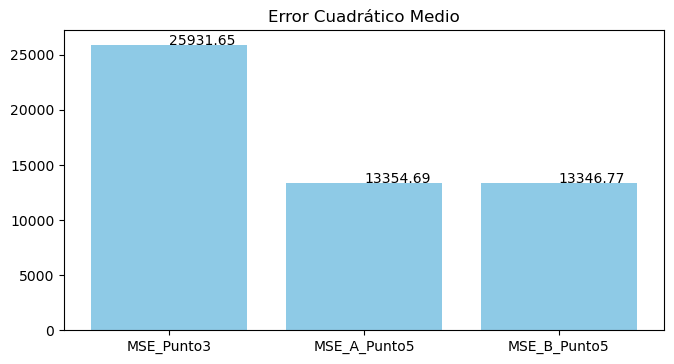

In [38]:
# MSE
fig = plt.figure(figsize = (6,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Error Cuadrático Medio")
ejeX = ['MSE_Punto3', 'MSE_A_Punto5', 'MSE_B_Punto5']
ejeY = [round(MSE_P3, 2), round(MSE_P5A, 2), round(MSE_P5B, 2)]
ax.bar(ejeX, ejeY, color = '#8ecae6')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* Finalmente podemos concluir que los modelos de árboles de decisión tienen un mejor desempeño para este caso, obteniendo un mejor puntaje de MSE que el modelo de regresión lineal.

* Para este caso el modelo que mejor desempeño tiene sería el modelo B del punto 5.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [39]:
# Lectura de la información de archivo .csv
df2 = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df2.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [40]:
# Definición variable de interes y variables predictoras
X1 = df2.drop(['url', 'Popular'], axis=1)
y1 = df2['Popular']
y1.mean()

0.5

In [41]:
# División de la muestra en set de entrenamiento y prueba
X_Train3, X_Test3, y_Train3, y_Test3 = train_test_split(X1, y1, test_size=0.2, random_state=0)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [42]:
# Celda 6
# Árbol de Decisión

# Estimación del Modelo
clf_DT = DecisionTreeClassifier(criterion='entropy', # mejor resultado que con el gini
                                max_depth=4, # mejor ajuste
                                min_samples_split=2,
                                random_state=0)
clf_DT.fit(X_Train3, y_Train3)

# Cálculo de las predicciones en la muestra de evaluación
P_DT = clf_DT.predict(X_Test3)

# Cálculo de métricas 
accuracy_DT = metrics.accuracy_score(y_Test3, P_DT)
f1_DT = metrics.f1_score(y_Test3, P_DT)

print('Accuracy: %.4f' % accuracy_DT)
print("F1 Score:", round(f1_DT,4))

Accuracy: 0.6542
F1 Score: 0.6834


In [43]:
# Regresión logística

# Estimación del Modelo
clf_RL = LogisticRegression()
clf_RL.fit(X_Train3, y_Train3)

# Cálculo de las predicciones en la muestra de evaluación
P_RL = clf_RL.predict(X_Test3)

# Cálculo de métricas 
accuracy_RL = metrics.accuracy_score(y_Test3, P_RL)
f1_RL = metrics.f1_score(y_Test3, P_RL)

print('Accuracy: %.4f' % accuracy_RL)
print("F1 Score:", round(f1_RL,4))

Accuracy: 0.6208
F1 Score: 0.6243


## Comparar los resultados

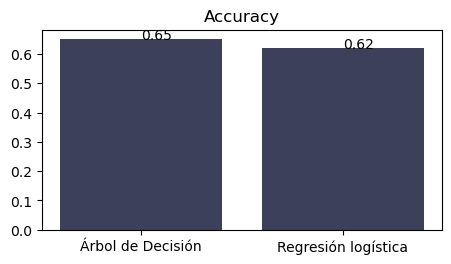

In [44]:
# Accuracy
fig = plt.figure(figsize = (4,2))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Árbol de Decisión', 'Regresión logística']
ejeY = [round(accuracy_DT, 2), round(accuracy_RL, 2)]
ax.bar(ejeX, ejeY, color = '#3d405b')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

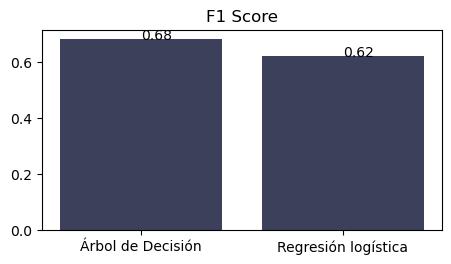

In [45]:
# F1 Score
fig = plt.figure(figsize = (4,2))
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1 Score")
ejeX = ['Árbol de Decisión', 'Regresión logística']
ejeY = [round(f1_DT, 2), round(f1_RL, 2)]
ax.bar(ejeX, ejeY, color = '#3d405b')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* Para este punto el arbol de decisión tienen un mejor desempeño, tanto en Accuracy como en F1 Score.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [46]:
# Celda 7
# Creación de 300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_Train3.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [47]:
# Entrenamiento de 300 modelos con las 300 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    if i < 100:
        trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=10, random_state=seeds[i])
        trees[i].fit(X_Train3.iloc[samples[i]], y_Train3.iloc[samples[i]])
    elif i >= 100 & i < 200:
        trees[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=25, random_state=seeds[i])
        trees[i].fit(X_Train3.iloc[samples[i]], y_Train3.iloc[samples[i]])
    else:
        trees[i] = LogisticRegression()
        trees[i].fit(X_Train3.iloc[samples[i]], y_Train3.iloc[samples[i]])

In [48]:
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_Test3.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_Test3)

y_pred_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
4320,1,0,0,1,1,1,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
2006,1,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,1,0,0
5689,1,0,0,1,1,1,0,1,1,0,...,1,1,1,1,0,0,1,1,1,1


In [49]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:3]

4320    142
2006    150
5689    204
dtype: int64

## Evaluación del 1er Modelo

In [50]:
y_pred_M1 = y_pred_df.iloc[:,0:100]
y_pred_M1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4320,1,0,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
2006,1,0,0,0,0,1,1,0,0,0,...,1,1,1,0,0,1,1,1,1,1
5689,1,0,0,1,1,1,0,1,1,0,...,1,0,1,0,0,1,1,1,1,0


In [51]:
# Votación mayoritaria
y_pred1 = (y_pred_M1.sum(axis=1) >= (100 / 2)).astype(np.int)
# Desempeño al hacer votación mayoritaria
F1_M1 = metrics.f1_score(y_pred1, y_Test3)
F1_M1

0.6836653386454182

In [52]:
# Desempeño al hacer votación mayoritaria
accuracy_M1 = metrics.accuracy_score(y_pred1, y_Test3)
accuracy_M1

0.6691666666666667

## Evaluación del 2do Modelo

In [53]:
y_pred_M2 = y_pred_df.iloc[:,100:200]
y_pred_M2.head(3)

,100,101,102,103,104,105,106,107,108,109,...,190,191,192,193,194,195,196,197,198,199
4320,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,1
2006,0,0,0,0,1,0,1,0,0,0,...,1,0,1,1,1,0,1,0,1,1
5689,1,0,0,1,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,1,0


In [54]:
# Votación mayoritaria
y_pred2 = (y_pred_M2.sum(axis=1) >= (100 / 2)).astype(np.int)
# Desempeño al hacer votación mayoritaria
F1_M2 = metrics.f1_score(y_pred2, y_Test3)
F1_M2

0.6768982229402262

In [55]:
# Desempeño al hacer votación mayoritaria
accuracy_M2 = metrics.accuracy_score(y_pred2, y_Test3)
accuracy_M2

0.6666666666666666

## Evaluación del 3er Modelo

In [56]:
y_pred_M3 = y_pred_df.iloc[:,200:]
y_pred_M3.head(3)

,200,201,202,203,204,205,206,207,208,209,...,290,291,292,293,294,295,296,297,298,299
4320,0,1,0,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2006,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
5689,1,1,1,0,1,1,1,0,0,1,...,1,1,1,1,0,0,1,1,1,1


In [57]:
# Votación mayoritaria
y_pred3 = (y_pred_M3.sum(axis=1) >= (100 / 2)).astype(np.int)
# Desempeño al hacer votación mayoritaria
F1_M3 = metrics.f1_score(y_pred3, y_Test3)
F1_M3

0.6774716369529984

In [58]:
# Desempeño al hacer votación mayoritaria
accuracy_M3 = metrics.accuracy_score(y_pred3, y_Test3)
accuracy_M3

0.6683333333333333

## Evaluación del Ensamble

In [59]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
F1_M = metrics.f1_score(y_pred, y_Test3)
F1_M

0.6806451612903226

In [60]:
# Desempeño al hacer votación mayoritaria
accuracy_M = metrics.accuracy_score(y_pred, y_Test3)
accuracy_M

0.67

## Comparar los resultados

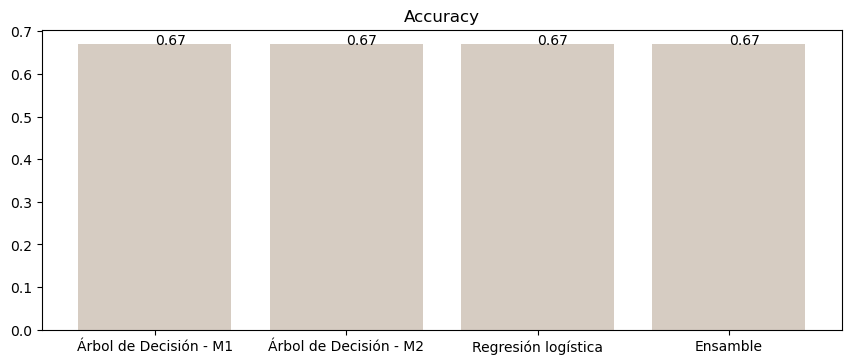

In [61]:
# Accuracy
fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Árbol de Decisión - M1', 'Árbol de Decisión - M2', 'Regresión logística', 'Ensamble']
ejeY = [round(accuracy_M1, 2), round(accuracy_M2, 2), round(accuracy_M3, 2), round(accuracy_M, 2)]
ax.bar(ejeX, ejeY, color = '#d6ccc2')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

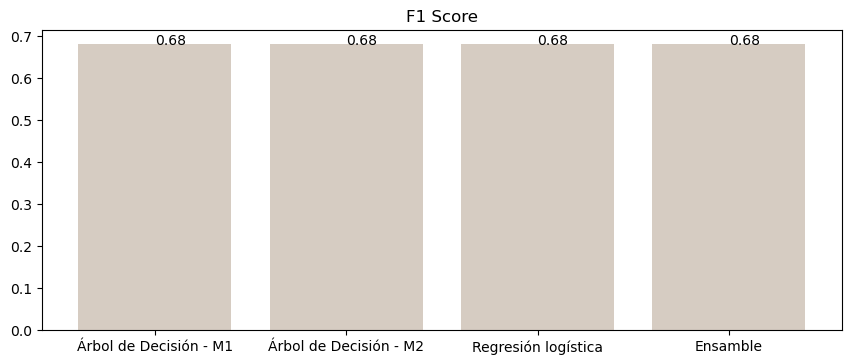

In [62]:
# F1 Score
fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1 Score")
ejeX = ['Árbol de Decisión - M1', 'Árbol de Decisión - M2', 'Regresión logística', 'Ensamble']
ejeY = [round(F1_M1, 2), round(F1_M2, 2), round(F1_M3, 2), round(F1_M, 2)]
ax.bar(ejeX, ejeY, color = '#d6ccc2')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* Para este caso podemos observar que coincidencialmente para todos los modelos y ambas metricas la ponderación es la misma.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [63]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

### Modelo 1

In [64]:
# Estimación de los errores OOB para el modelo 1
errors1 = np.zeros(round(n_estimators/3))

for i in range(0,100):
    y_pred_1 = trees[i].predict(X_Train3.iloc[samples_oob[i]])
    errors1[i] = 1 - metrics.accuracy_score(y_Train3.iloc[samples_oob[i]], y_pred_1)

Text(0.5, 1.0, 'OOB error of each tree')

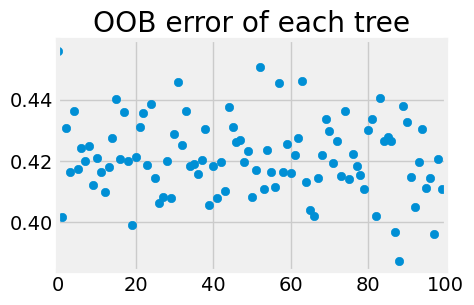

In [65]:
# Visualización de OOB para cada árbol
plt.figure(figsize=(5,3))
plt.style.use('fivethirtyeight')
plt.scatter(range(round(n_estimators/3)), errors1)
plt.xlim([0, round(n_estimators/3)])
plt.title('OOB error of each tree')

In [66]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha1 = (1 - errors1) / (1 - errors1).sum()

In [67]:
# Ponderación de las predicciones con los pesos alpha
weighted_1 = ((y_pred_M1) * alpha1).sum(axis=1)
weighted_1.head(3)

4320    0.449261
2006    0.520141
5689    0.650566
dtype: float64

In [68]:
# Desempeño al hacer votación ponderada
y_pred_error1 = (weighted_1 >= 0.5).astype(np.int)
F1_PM1 = metrics.f1_score(y_pred_error1, y_Test3) 
accuracy_PM1 = metrics.accuracy_score(y_pred_error1, y_Test3)
F1_PM1, accuracy_PM1

(0.6826923076923077, 0.67)

### Modelo 2

In [69]:
# Estimación de los errores OOB para el modelo 2
errors2 = np.zeros(round(n_estimators/3))

for i in range(100,200):
    y_pred_2 = trees[i].predict(X_Train3.iloc[samples_oob[i]])
    errors2[i-100] = 1 - metrics.accuracy_score(y_Train3.iloc[samples_oob[i]], y_pred_2)

Text(0.5, 1.0, 'OOB error of each tree')

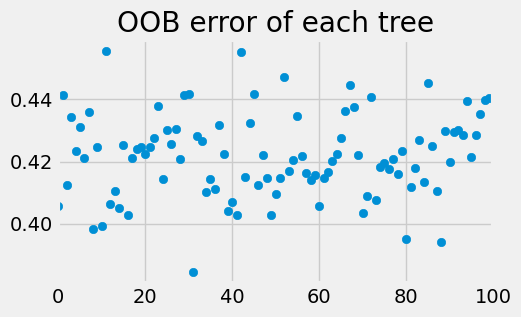

In [70]:
# Visualización de OOB para cada árbol
plt.figure(figsize=(5,3))
plt.style.use('fivethirtyeight')
plt.scatter(range(round(n_estimators/3)), errors2)
plt.xlim([0, round(n_estimators/3)])
plt.title('OOB error of each tree')

In [71]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha2 = (1 - errors2) / (1 - errors2).sum()

In [72]:
# Ponderación de las predicciones con los pesos alpha
weighted_2 = ((y_pred_M2) * alpha2).sum(axis=1)
weighted_2.head(3)

4320    0.512421
2006    0.539570
5689    0.661477
dtype: float64

In [73]:
# Desempeño al hacer votación ponderada
y_pred_error2 = (weighted_2 >= 0.5).astype(np.int)
F1_PM2 = metrics.f1_score(y_pred_error2, y_Test3) 
accuracy_PM2 = metrics.accuracy_score(y_pred_error2, y_Test3)
F1_PM2, accuracy_PM2

(0.676973148901546, 0.6691666666666667)

### Modelo 3

In [74]:
# Estimación de los errores OOB para el modelo 3
errors3 = np.zeros(round(n_estimators/3))

for i in range(200,300):
    y_pred_3 = trees[i].predict(X_Train3.iloc[samples_oob[i]])
    errors3[i-200] = 1 - metrics.accuracy_score(y_Train3.iloc[samples_oob[i]], y_pred_3)

Text(0.5, 1.0, 'OOB error of each tree')

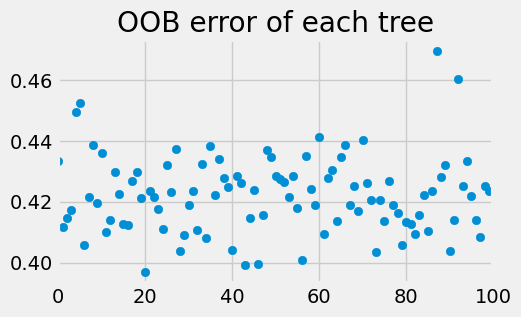

In [75]:
# Visualización de OOB para cada árbol
plt.figure(figsize=(5,3))
plt.style.use('fivethirtyeight')
plt.scatter(range(round(n_estimators/3)), errors3)
plt.xlim([0, round(n_estimators/3)])
plt.title('OOB error of each tree')

In [76]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha3 = (1 - errors3) / (1 - errors3).sum()

In [77]:
# Ponderación de las predicciones con los pesos alpha
weighted_3 = ((y_pred_M3) * alpha3).sum(axis=1)
weighted_3.head(3)

4320    0.462020
2006    0.441175
5689    0.730158
dtype: float64

In [78]:
# Desempeño al hacer votación ponderada
y_pred_error3 = (weighted_3 >= 0.5).astype(np.int)
F1_PM3 = metrics.f1_score(y_pred_error3, y_Test3)
accuracy_PM3 = metrics.accuracy_score(y_pred_error3, y_Test3)
F1_PM3, accuracy_PM3

(0.6726530612244898, 0.6658333333333334)

### Todos los Modelos

In [79]:
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_Train3.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_Train3.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

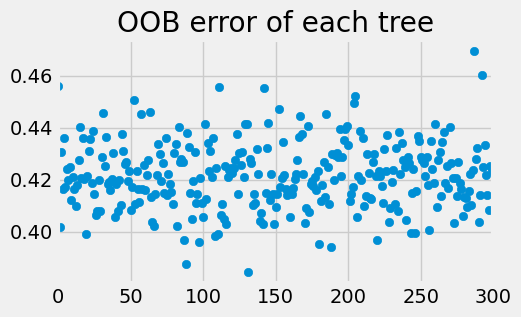

In [80]:
# Visualización de OOB para cada árbol
plt.figure(figsize=(5,3))
plt.style.use('fivethirtyeight')
plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [81]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [82]:
# Ponderación de las predicciones con los pesos alpha
weighted = ((y_pred_df) * alpha).sum(axis=1)
weighted.head(3)

4320    0.474562
2006    0.500319
5689    0.680709
dtype: float64

In [83]:
# Desempeño al hacer votación ponderada
y_pred_error = (weighted >= 0.5).astype(np.int)
F1_PM = metrics.f1_score(y_pred_error, y_Test3)
accuracy_PM = metrics.accuracy_score(y_pred_error, y_Test3)
F1_PM, accuracy_PM

(0.6806790622473726, 0.6708333333333333)

## Comparar los resultados

In [84]:
sns.reset_orig()

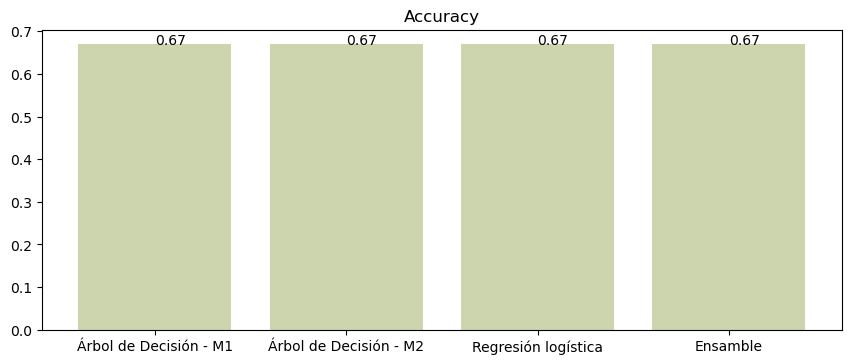

In [85]:
# Accuracy
fig = plt.figure(figsize = (8,3))
#plt.style.use('seaborn-white')
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Árbol de Decisión - M1', 'Árbol de Decisión - M2', 'Regresión logística', 'Ensamble']
ejeY = [round(accuracy_PM1, 2), round(accuracy_PM2, 2), round(accuracy_PM3, 2), round(accuracy_PM, 2)]
ax.bar(ejeX, ejeY, color = '#ccd5ae')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

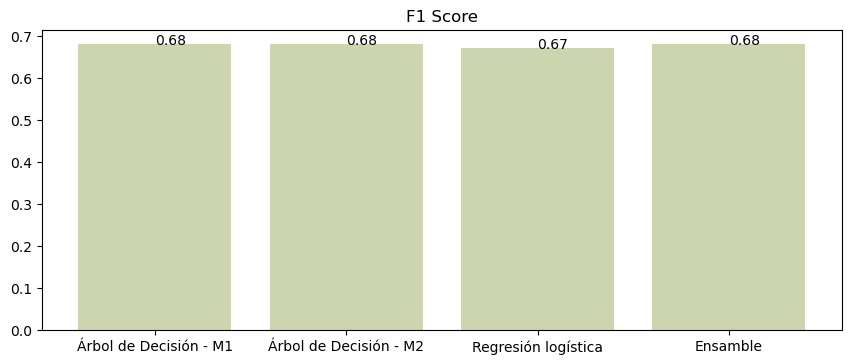

In [86]:
# F1 Score
fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1 Score")
ejeX = ['Árbol de Decisión - M1', 'Árbol de Decisión - M2', 'Regresión logística', 'Ensamble']
ejeY = [round(F1_PM1, 2), round(F1_PM2, 2), round(F1_PM3, 2), round(F1_PM, 2)]
ax.bar(ejeX, ejeY, color = '#ccd5ae')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* Para este caso la metrica de accuracy se manteniene igual para todos los modelos, mientras que la metrica F1 Score tambien es muy similar pero solo para regresión Logistica existe una ligera variación negativa.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

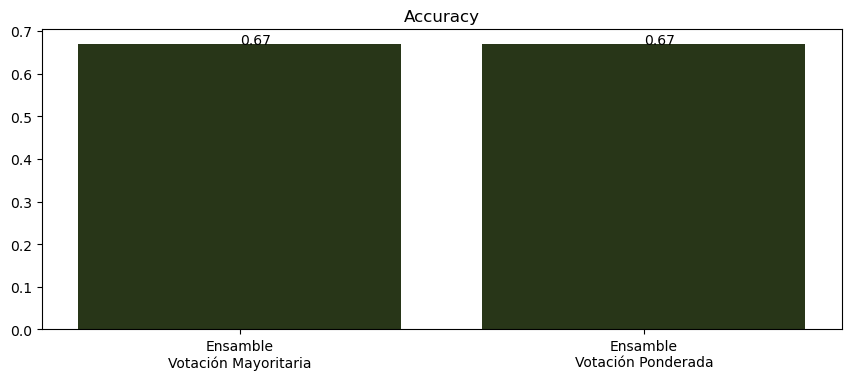

In [87]:
# Celda 9

# Accuracy
fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Ensamble\nVotación Mayoritaria', 'Ensamble\nVotación Ponderada']
ejeY = [round(accuracy_M, 2), round(accuracy_PM, 2)]
ax.bar(ejeX, ejeY, color = '#283618')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

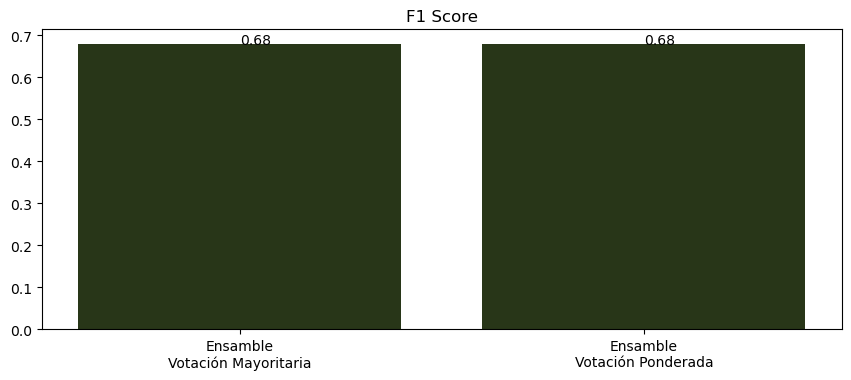

In [88]:
# F1 Score
fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1 Score")
ejeX = ['Ensamble\nVotación Mayoritaria', 'Ensamble\nVotación Ponderada']
ejeY = [round(F1_M, 2), round(F1_PM, 2)]
ax.bar(ejeX, ejeY, color = '#283618')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* Finalmete solo comparando las metricas de los ensambles de votación mayoritaria y votación ponderada, podemos ver que para ambos casos la puntuación es igual sin embargo es importante más que hablar de ventajas o desventajas considero que es importanto siempre hacer pruebas con el objetivo de siempre obtener los mejores resultados. 